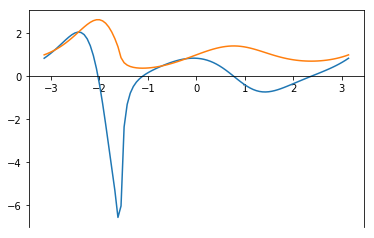

In [1]:
import numpy as np
from scipy import linalg as la
import sympy as sy
from matplotlib import pyplot as plt

# Problem 1
from sympy.utilities.lambdify import lambdify

def prob1():
    x = sy.Symbol('x')
    fx = (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
    f_prime = sy.diff(fx, x)
    f = lambdify(x, f_prime, 'numpy')
    return f

x = np.linspace(-np.pi, np.pi, 100)
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(x, prob1()(x))
ax.plot(x, (np.sin(x) + 1) ** np.sin(np.cos(x)))
plt.show()

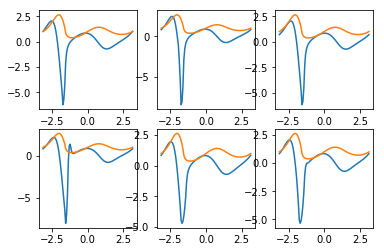

In [2]:
# Problem 2
def forward1(f, x, h):
    return (f(x+h)-f(x))/h

def forward2(f, x, h):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)

def backward1(f, x, h):
    return (f(x)-f(x-h))/h

def backward2(f, x, h):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)

def center2(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)

def center4(f, x, h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)

f = lambda x: (np.sin(x) + 1) ** np.sin(np.cos(x))
x = np.linspace(-np.pi, np.pi, 100)
h = 0.2

plt.subplot(231)
plt.plot(x, forward1(f, x, h))
plt.plot(x, (np.sin(x) + 1) ** np.sin(np.cos(x)))
plt.subplot(232)
plt.plot(x, forward2(f, x, h))
plt.plot(x, (np.sin(x) + 1) ** np.sin(np.cos(x)))
plt.subplot(233)
plt.plot(x, backward1(f, x, h))
plt.plot(x, (np.sin(x) + 1) ** np.sin(np.cos(x)))
plt.subplot(234)
plt.plot(x, backward2(f, x, h))
plt.plot(x, (np.sin(x) + 1) ** np.sin(np.cos(x)))
plt.subplot(235)
plt.plot(x, center2(f, x, h))
plt.plot(x, (np.sin(x) + 1) ** np.sin(np.cos(x)))
plt.subplot(236)
plt.plot(x, center4(f, x, h))
plt.plot(x, (np.sin(x) + 1) ** np.sin(np.cos(x)))
plt.show()

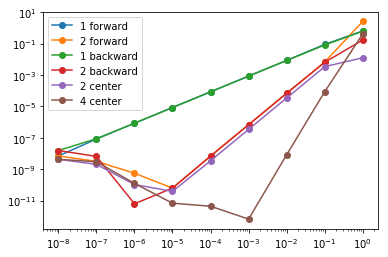

In [3]:
# Problem 3
def prob3(x0):
    f = lambda x: (np.sin(x) + 1) ** np.sin(np.cos(x))
    deriv = prob1()(x0)
    
    h = np.logspace(-8, 0, 9)
    
    error1 = abs(deriv - forward1(f, x0, h))
    
    error2 = abs(deriv - forward2(f, x0, h))
    
    error3 = abs(deriv - backward1(f, x0, h))
    
    error4 = abs(deriv - backward2(f, x0, h))
    
    error5 = abs(deriv - center2(f, x0, h))
    
    error6 = abs(deriv - center4(f, x0, h))
    
    return error1, error2, error3, error4, error5, error6

x = np.linspace(-np.pi, np.pi, 100)

mat1 = np.zeros((100, 9))
mat2 = np.zeros((100, 9))
mat3 = np.zeros((100, 9))
mat4 = np.zeros((100, 9))
mat5 = np.zeros((100, 9))
mat6 = np.zeros((100, 9))
for i in range(100):
    mat1[i, :] = prob3(x[i])[0]
    mat2[i, :] = prob3(x[i])[1]
    mat3[i, :] = prob3(x[i])[2]
    mat4[i, :] = prob3(x[i])[3]
    mat5[i, :] = prob3(x[i])[4]
    mat6[i, :] = prob3(x[i])[5]
    
plt.loglog(np.logspace(-8, 0, 9), mat1[1],label = '1 forward', marker ='o')
plt.loglog(np.logspace(-8, 0, 9), mat2[1],label = '2 forward',  marker ='o')
plt.loglog(np.logspace(-8, 0, 9), mat3[1],label = '1 backward',  marker ='o')
plt.loglog(np.logspace(-8, 0, 9), mat4[1],label = '2 backward',  marker ='o')
plt.loglog(np.logspace(-8, 0, 9), mat5[1],label = '2 center',  marker ='o')
plt.loglog(np.logspace(-8, 0, 9), mat6[1],label = '4 center',  marker ='o')
plt.legend()
plt.show()

In [4]:
# Problem 4
plane = np.load('plane.npy')
plane
t = plane[:, 0]
alpha = plane[:, 1]
beta = plane[:, 2]
a = 500
alpha = np.deg2rad(alpha)
beta = np.deg2rad(beta)
x = a * (np.tan(beta))/(np.tan(beta) - np.tan(alpha))
y = a * (np.tan(beta) * np.tan(alpha))/(np.tan(beta) - np.tan(alpha))
xm = (x[2:] - x[:-2])/2
x1 = np.array([x[1] - x[0]])
xn = np.array([x[-1] - x[-2]])
dx = np.concatenate((x1, xm, xn))

y1 = np.array([y[1] - y[0]])
yn = np.array([y[-1] - y[-2]])
ym = (y[2:] - y[:-2])/2
dy = np.concatenate((y1, ym, yn))
print((dx ** 2 + dy ** 2) ** .5)

[ 46.42420062  47.00103938  48.99880514  50.09944163  48.29035084
  51.56455905  53.92303355  51.51480057]


In [5]:
# Problem 5
def jacobian(f, x, h):
    n = np.shape(x)[0]
    m = np.shape(f)[0]
    mat = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            I = np.eye(n)
            mat[i,j] = (f(x + h * I[:, j])[i] - f(x + h * I[:, j])[i])/(2 * h)  
    return mat

In [6]:
# Problem 6
from autograd import grad
import autograd.numpy as anp
from autograd import multigrad
import time

x = sy.Symbol('x')
f = sy.log(sy.sqrt(sy.sin(sy.sqrt(x))))
x0 = np.pi/4
start1 = time.time()
sy = sy.diff(f, x)
sy1 = lambdify(x, sy,'numpy')
print(sy1(x0))
end1 = time.time()
print('sympy: '+ str(end1 - start1))

f1 = lambda x: anp.log(anp.sqrt(anp.sin(anp.sqrt(x))))
start2 = time.time()
grad_f = grad(f1)
print(grad_f(x0))
end2 = time.time()
print('autograd: '+ str(end2 - start2))


0.230259011147
sympy: 0.008476972579956055
0.230259011147
autograd: 0.000759124755859375


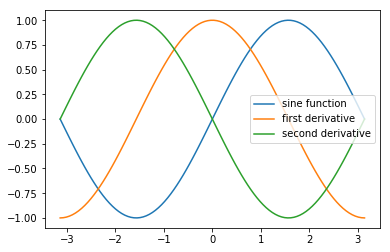

In [7]:
import math
# Problem 7
def taylor_sin(x, tol=1e-5):
    result = 0
    cur_term = x
    i = 0
    while anp.abs(cur_term) >= tol:
        cur_term = ((-1) ** (i)) * x ** (2 * i + 1)/np.math.factorial(2 * i + 1)
        result += cur_term
        i += 1
    return result

d_taylor_sin = grad(taylor_sin)
d2 = grad(d_taylor_sin)
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x, np.sin(x), label ='sine function')
plt.plot(x, [d_taylor_sin(x) for x in x], label = 'first derivative')
plt.plot(x, [d2(x) for x in x], label = 'second derivative')
plt.legend()
plt.show()

In [9]:
# Problem 8
import sympy as sy
from autograd import jacobian

x, y = sy.symbols('x y')
f1 = sy.exp(x) * sy.sin(y) + y ** 3
f2 = 3 * y - sy.cos(x)

x0 = 1
y0 = 1

start1 = time.time()
J1 = np.zeros((2, 2))

sy11 = sy.diff(f1, x)
s11 = lambdify((x,y), sy11,'numpy')
sy12 = sy.diff(f1, y)
s12 = lambdify((x,y), sy12,'numpy')

sy21 = sy.diff(f2, x)
s21 = lambdify((x,y), sy21,'numpy')
sy22 = sy.diff(f2, y)
s22 = lambdify((x,y), sy22,'numpy')

J1[0, 0] = s11(x0, y0)
J1[0, 1] = s12(x0, y0)
J1[1, 0] = s21(x0, y0)
J1[1, 1] = s22(x0, y0)
print(J1)
end1 = time.time()
print('sympy: '+ str(end1 - start1))

J2 = np.zeros((2,2))
h = 0.1
start2 = time.time()
f1 = lambda x,y: np.exp(x) * np.sin(y) + y ** 3
f2 = lambda x,y: 3 * y - np.cos(x)
J2[0,0] = (f1(x0+h, y0) - f1(x0-h, y0))/(2 * h)
J2[0,1] = (f1(x0, y0+h) - f1(x0, y0-h))/(2 * h)
J2[1,0] = (f2(x0+h, y0) - f2(x0-h, y0))/(2 * h)
J2[1,1] = (f2(x0, y0+h) - f2(x0, y0-h))/(2 * h)
print(J2)
end2 = time.time()
print('centered derivative: ' + str(end2- start2))

start3 = time.time()
f = lambda x: anp.array([anp.exp(x[0]) * anp.sin(x[1]) + x[1] ** 3, 3 * x[1]-anp.cos(x[0])])
jacobian_f = jacobian(f)
J3 = jacobian_f(anp.array([1.,1.]))
print(J3)
end3 = time.time()
print('autograd: '+ str(end3 - start3))

[[ 2.28735529  4.46869394]
 [ 0.84147098  3.        ]]
sympy: 0.014474868774414062
[[ 2.29116945  4.47624734]
 [ 0.84006923  3.        ]]
centered derivative: 0.0011949539184570312
[[ 2.28735529  4.46869394]
 [ 0.84147098  3.        ]]
autograd: 0.003020763397216797
